**Q8) La fonction $f: (\theta_0, \theta_1) \mapsto \frac{1}{2}\sum_{i=1}^{n}(y_i-\theta_0-\theta_1x_i)^2$ est-elle convexe ou concave ?**
<hr>

Intuitivement par la parité de ce polynôme en plusieurs indéterminées, on s'attend à ce que cette fonction soit convexe. Vérifions cela: 

Posons 
$$
\begin{array}{ll}
f: & \mathbb{R^2} \rightarrow \mathbb{R}\\
& (\theta_0, \theta_1) \mapsto \frac{1}{2}\sum_{i=1}^{n}(y_i-\theta_0-\theta_1x_i)^2
\end{array}
$$

$f$ est deux fois différentiables d'après le développement de Taylor à l'ordre 2:
$$\forall \theta=\begin{pmatrix}\theta_0\\ \theta_1\end{pmatrix}\in \mathbb{R^2} \quad  f(\theta + h) = f(\theta) + df_\theta(h) + \frac{1}{2}df_\theta^2(h) + o(\|h\|^2)$$ pour un quelconque $h=\begin{pmatrix}h_1\\h_2\end{pmatrix}$ de norme assez proche de $0$,
avec $df_\theta(h) = \left<h, \bigtriangledown f(\theta)\right>$ et 
$df_\theta^2(h) = \left<h, H_f(\theta)h\right>$.

$\bigtriangledown f(\theta)$ est le gradient de f en $\theta$ et $H_f(\theta)$ est la matrice hessienne de f en $\theta$.

Ainsi $f$ est convexe ssi la matrice hessienne de $f$ est semi-définie positive, autrement dit comme elle est symétrique, $H_f$ doit appartenir à $S_2^{++}(\mathbb{R})$ (l'ensemble de matrice symétrique réelle semi-définie positive d'ordre 2). C'est-à-dire:

$$\forall \theta,h \in \mathbb{R}^2\quad df_\theta^2(h) = \left<h, H_f(\theta)h\right> \ge 0$$

$f$ est concave ssi $-f$ est convexe, soit ssi la matrice hessienne de $f$ est semi-définie négative. 

Comme une somme de fonctions convexes est convexe, on peut se réduire à étudier la convexité à $i$ fixé de : 

$$
\begin{array}{ll}
f_i: & \mathbb{R^2} \rightarrow \mathbb{R}\\
& (\theta_0, \theta_1) \mapsto (y_i-\theta_0-\theta_1x_i)^2
\end{array}
$$

Etudions le signe de $df_{i,\theta}^2$.
D'après les notations de Monge, on pose:
$$r = \frac{\partial^2f_i}{\partial \theta_0^2}(\theta)\quad s = \frac{\partial^2f_i}{\partial \theta_0\partial \theta_1}(\theta) \quad t = \frac{\partial^2f_i}{\partial \theta_1^2}(\theta)$$

Ainsi $H_{f_i}(\theta) = \begin{pmatrix} r & s \\ s & t  \end{pmatrix}$, comme $H_{f_i}$ est symétrique, elle est semi-définie positive ssi toutes ses valeurs propres sont positives, autrement dit ssi le produit de ses deux valeurs et la somme de ses deux valeurs propres sont positives, soit ssi sa trace et son déterminant sont positifs. Ce qui revient à dire que: $r + t\ge 0$ et $rt - s^2 \ge 0$.

On pourrait calculer ici chaque coefficient de la matrice hersienne en développant $f_i(\theta + h)$ puis en identifier chaque terme par unicité du développement de Taylor. Mais calculons les plutôt avec les dérivées partielles:

$$\frac{\partial f_i}{\partial \theta_0}(\theta) = -2(y_i - \theta_o - \theta_1x_i)$$
$$\frac{\partial f_i}{\partial \theta_1}(\theta) = -2x_i(y_i - \theta_o - \theta_1x_i)$$

On en déduit que $r = 2$, $s = 2x_i$ et $t = 2x_i^2$, et donc que $f_i$ est convexe. Donc par somme $\boxed{f \text{ est convexe}}$.

Voici un graphique pour visualiser $f$ :

<IPython.core.display.Javascript object>


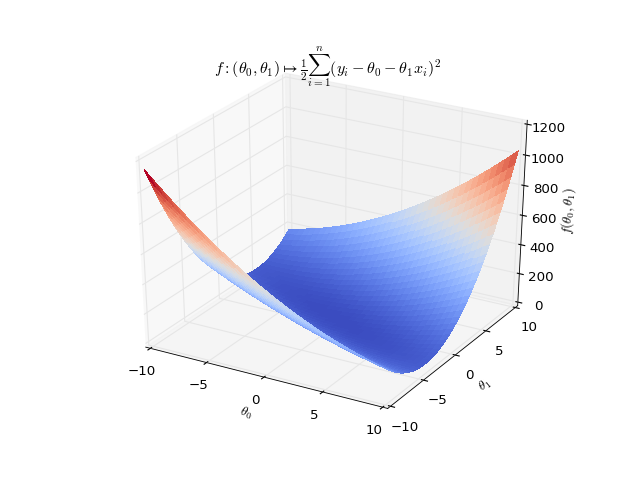

In [139]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def f(theta0, theta1):
    global X, Y
    return 1/2 * np.sum((Y - theta0 - theta1*X)**2)

# choose random x_i and y_i for i fom 1 to 10
n = 10
X = np.random.rand(1, n)
Y = np.random.rand(1, n)

v_theta0 = np.linspace(-10,10,40)
v_theta1 = np.linspace(-10,10,40)
v_theta0, v_theta1 = np.meshgrid(v_theta0, v_theta1)
f_values = np.vectorize(f)(v_theta1, v_theta0)
ax.plot_surface(v_theta0, v_theta1, f_values, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.set_title(r"$f: (\theta_0, \theta_1) \mapsto \frac{1}{2}\sum_{i=1}^{n}(y_i-\theta_0-\theta_1x_i)^2$")
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$f(\theta_0, \theta_1)$')
plt.show()
